<a href="https://colab.research.google.com/github/michaeljf00/data-science-portfolio/blob/main/Covid_19_Tests_Cases_and_Mortality_by_Zip_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

kagglehub.login()

In [ ]:
path = kagglehub.dataset_download("mahdiehhajian/covid-19-cases-tests-and-deaths")

In [ ]:
import os

dir = os.listdir(path)

data_file = None
with open(os.path.join(path, dir[1]), 'r') as f:
    data_file = f.name

In [ ]:
import pandas as pd
df = pd.read_csv(data_file)

In [ ]:
df.shape

(13132, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13132 entries, 0 to 13131
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ZIP Code                              13132 non-null  object 
 1   Week Number                           13132 non-null  int64  
 2   Week Start                            13132 non-null  object 
 3   Week End                              13132 non-null  object 
 4   Cases - Weekly                        12909 non-null  float64
 5   Cases - Cumulative                    12909 non-null  float64
 6   Case Rate - Weekly                    12909 non-null  float64
 7   Case Rate - Cumulative                12909 non-null  float64
 8   Tests - Weekly                        12740 non-null  float64
 9   Tests - Cumulative                    13132 non-null  int64  
 10  Test Rate - Weekly                    13132 non-null  int64  
 11  Test Rate - Cum

In [ ]:
df.describe()

,Week Number,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,Test Rate - Weekly,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population
count,13132.000000,12909.000000,12909.000000,12909.000000,12909.000000,12740.000000,13132.000000,13132.000000,1.313200e+04,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000
mean,26.170119,63.458440,8344.924161,136.947401,17734.813309,1225.955024,129983.026652,2677.341989,2.957631e+05,0.056298,0.074147,0.636689,105.623896,1.218299,199.797525,46258.380064
std,14.871736,121.313518,7516.565007,245.224599,11955.509645,1400.608932,135184.120574,3240.396176,2.931501e+05,0.078874,0.064195,1.634849,91.039144,3.309388,138.398733,26835.033756
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,11.000000,1989.000000,32.000000,7127.600000,158.000000,10100.500000,369.000000,2.742940e+04,0.000000,0.000000,0.000000,19.000000,0.000000,81.800000,28804.000000
50%,25.000000,30.000000,6503.000000,76.000000,19382.600000,835.500000,86097.000000,1946.000000,2.331007e+05,0.000000,0.100000,0.000000,90.000000,0.000000,192.900000,46024.000000
75%,39.000000,70.000000,12839.000000,150.000000,27597.600000,1807.250000,223838.750000,3795.250000,4.949480e+05,0.100000,0.100000,1.000000,168.000000,1.200000,309.000000,68096.000000
max,53.000000,2212.000000,36570.000000,6266.000000,64450.100000,13173.000000,538868.000000,75755.000000,2.037212e+06,1.000000,0.500000,25.000000,365.000000,80.400000,540.600000,111850.000000


In [ ]:
df.isna().sum()

,0
ZIP Code,0
Week Number,0
Week Start,0
Week End,0
Cases - Weekly,223
Cases - Cumulative,223
Case Rate - Weekly,223
Case Rate - Cumulative,223
Tests - Weekly,392
Tests - Cumulative,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Handle Null Values
df["Cases - Weekly"] = df["Cases - Weekly"].fillna(df["Cases - Weekly"].mean())
df["Cases - Cumulative"] = df["Cases - Cumulative"].fillna(df["Cases - Cumulative"].mean())
df["Case Rate - Weekly"] = df["Case Rate - Weekly"].fillna(df["Case Rate - Weekly"].mean())
df["Case Rate - Cumulative"] = df["Case Rate - Cumulative"].fillna(df["Case Rate - Cumulative"].mean())
df["Tests - Weekly"] = df["Tests - Weekly"].fillna(df["Tests - Weekly"].mean())

In [ ]:
df["ZIP Code Location"] = df["ZIP Code Location"].fillna(df["ZIP Code Location"].mode()[0])

In [ ]:
# Split date info into sperate columns
df["Week Start"] = pd.to_datetime(df["Week Start"])
df["Week End"] = pd.to_datetime(df["Week End"])

In [ ]:
df["Week Day Start"] = df["Week Start"].dt.day
df["Week Month Start"] = df["Week Start"].dt.month
df["Week Year Start"] = df["Week Start"].dt.year

df["Week Day End"] = df["Week End"].dt.day
df["Week Month End"] = df["Week End"].dt.month
df["Week Year End"] = df["Week End"].dt.year

In [ ]:
# Siplit zip code location info into columns for latitude and logiitude
df["ZIP Code Location"] = df["ZIP Code Location"].astype(str)
df["ZIP Code Location"] = df["ZIP Code Location"].str.replace("POINT", '').str.replace('(', '').str.replace(')', '')
df[["Latitude", "Longitude"]] = df["ZIP Code Location"].str.strip().str.split(' ', expand=True).astype(float)

In [ ]:
# Remove unnecessary columns for machine learning
df.drop(["ZIP Code", "ZIP Code Location", "Row ID", "Week Start", "Week End"], axis=1, inplace=True)

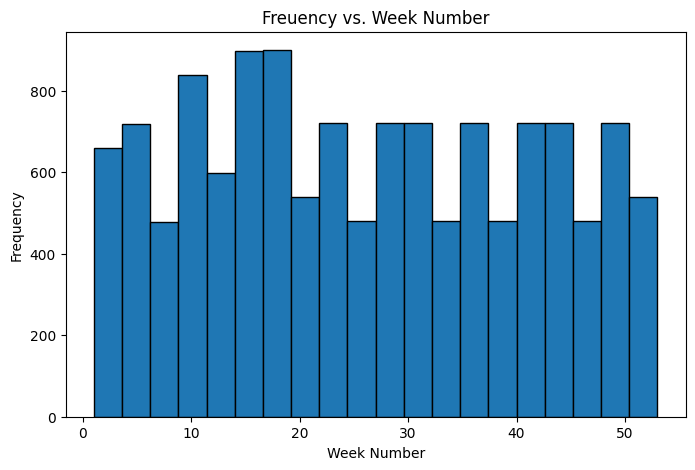

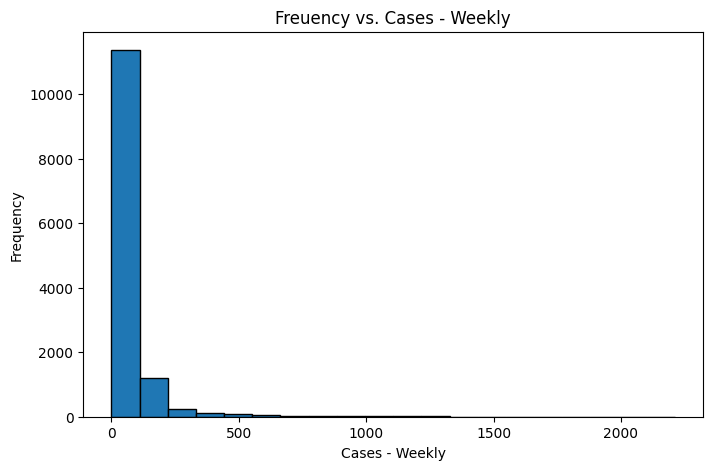

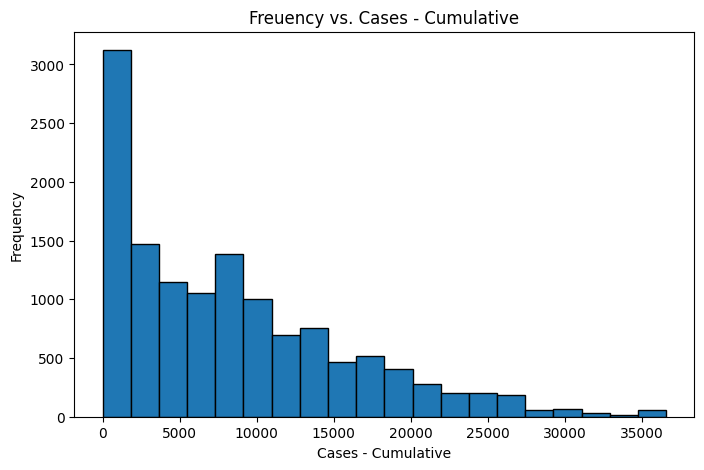

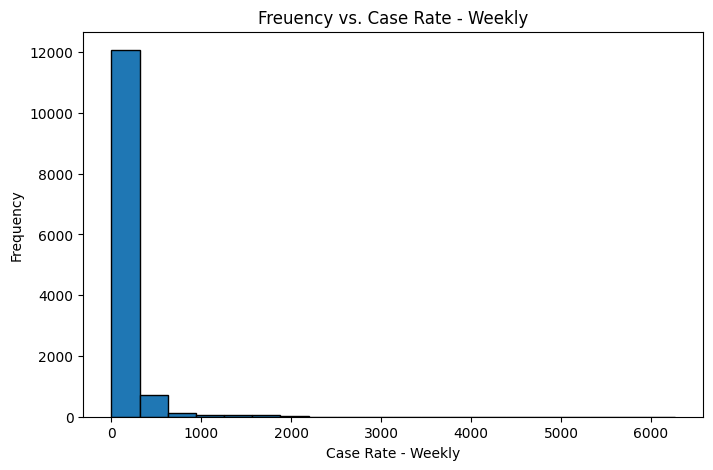

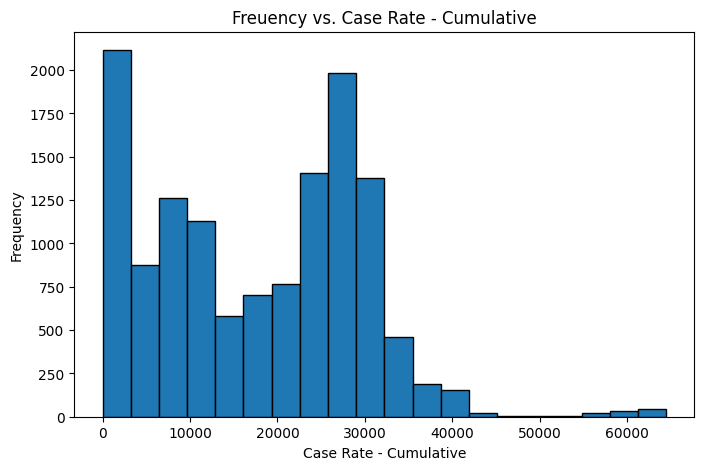

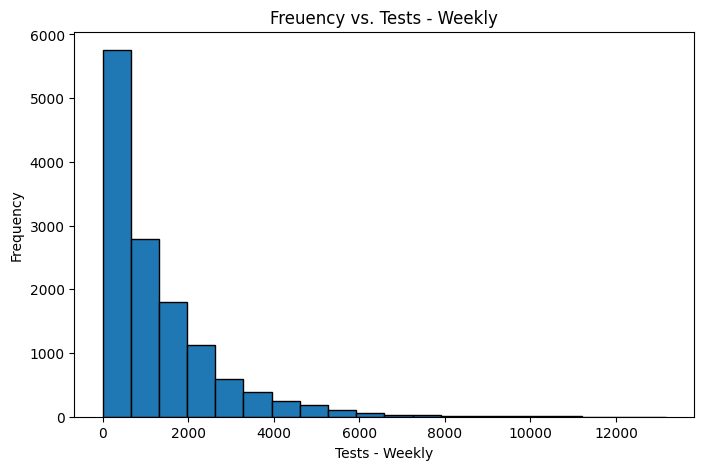

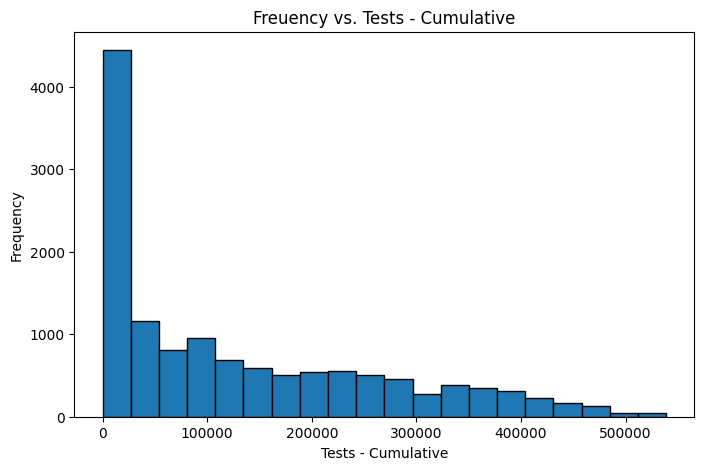

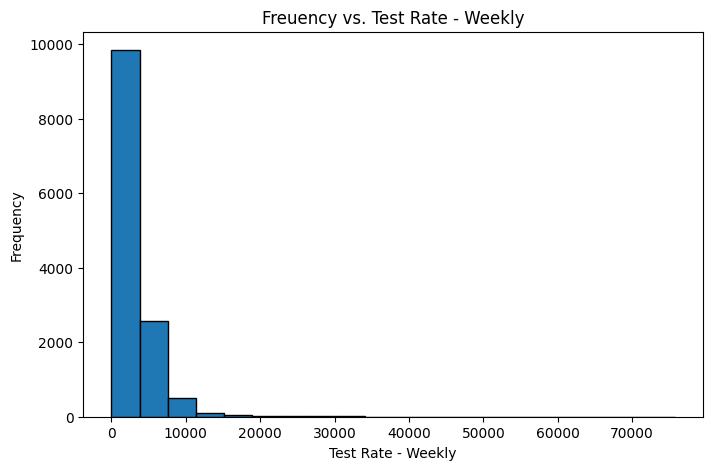

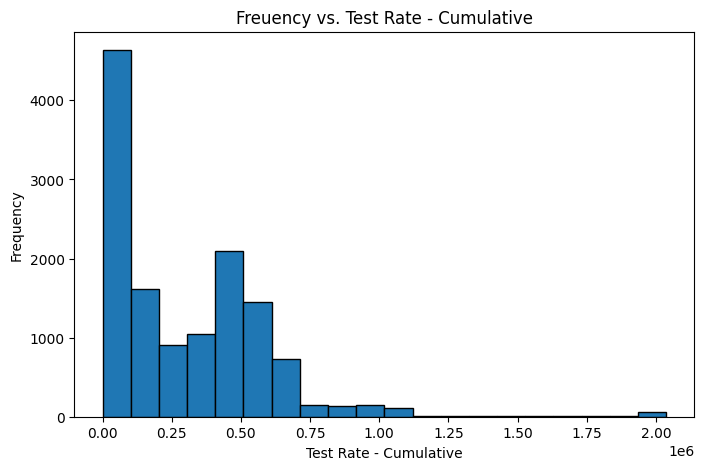

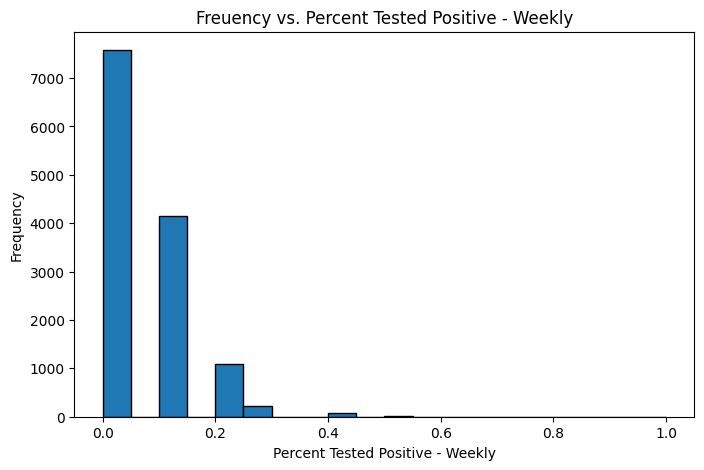

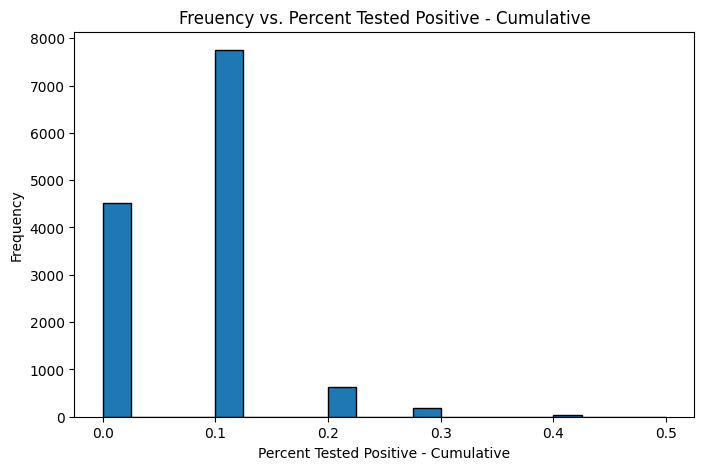

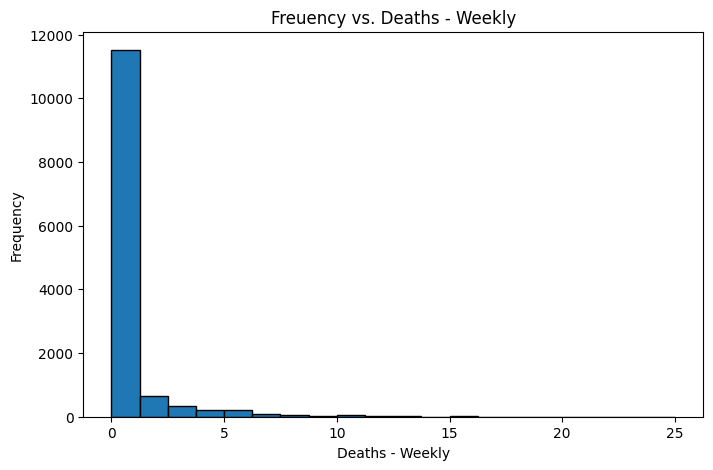

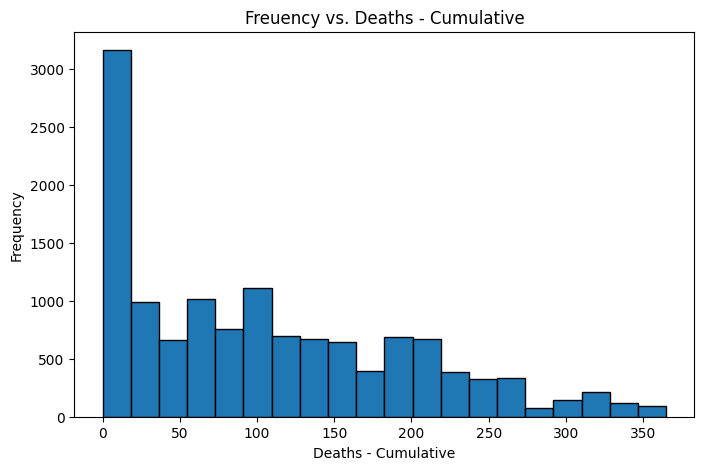

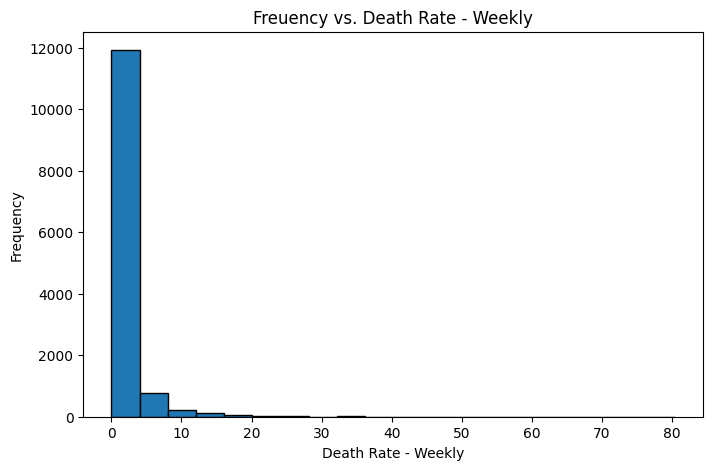

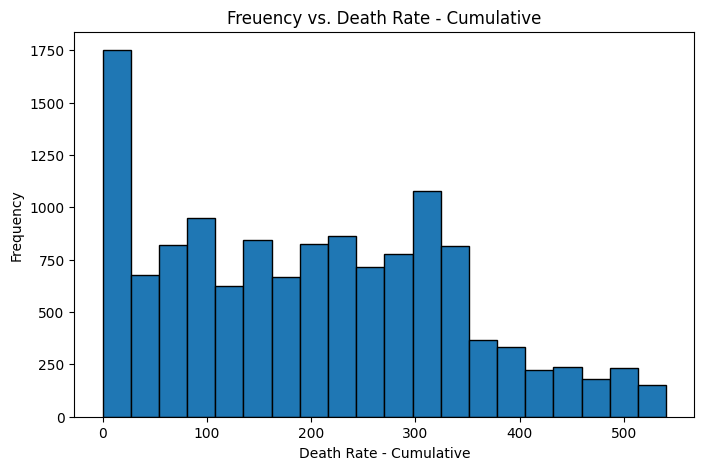

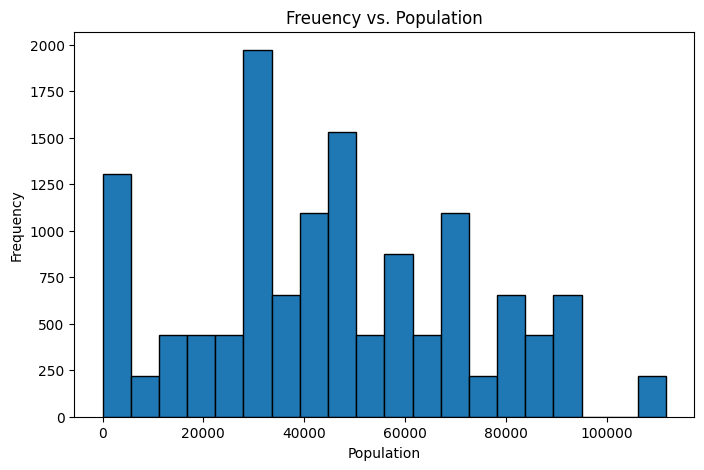

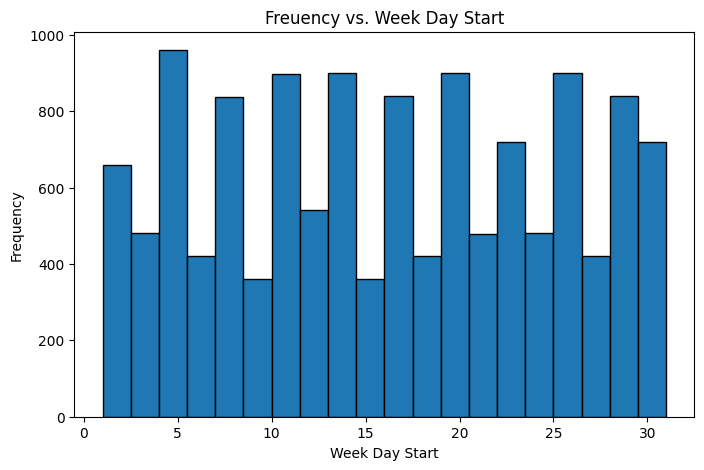

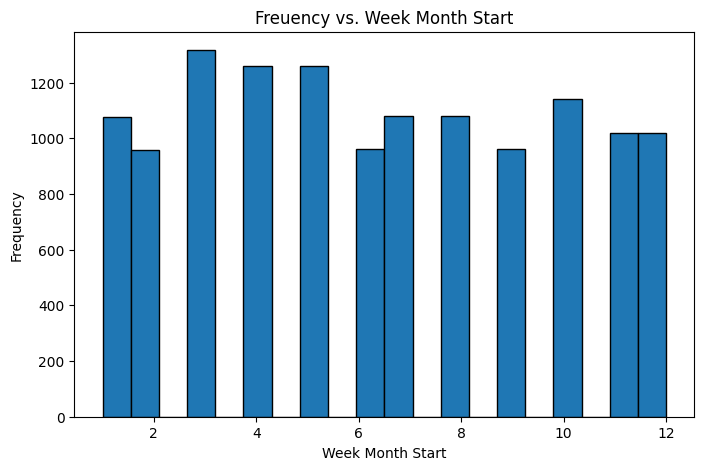

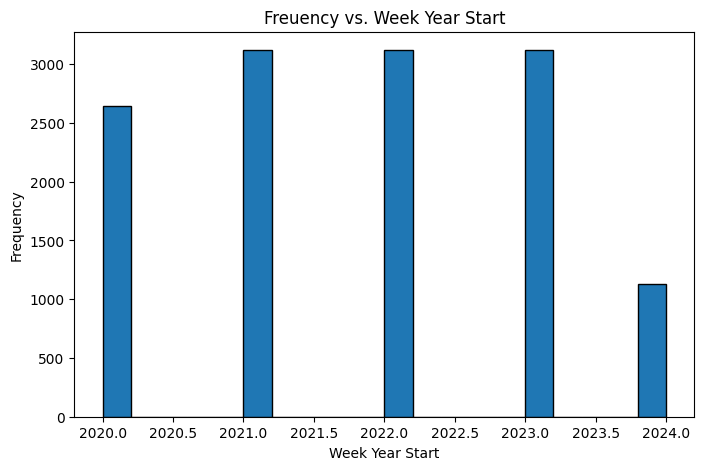

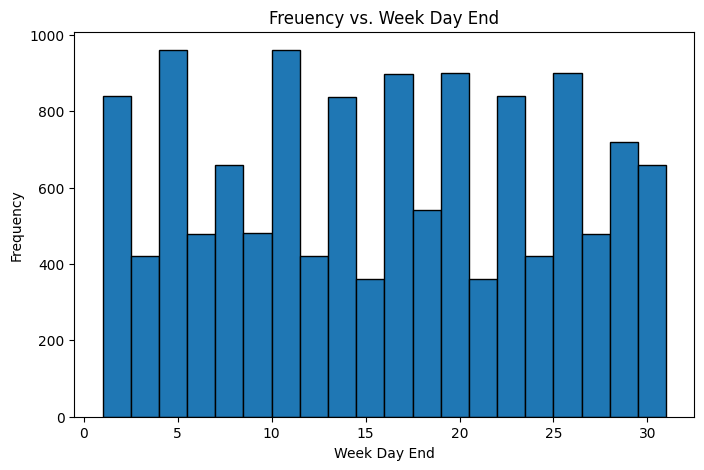

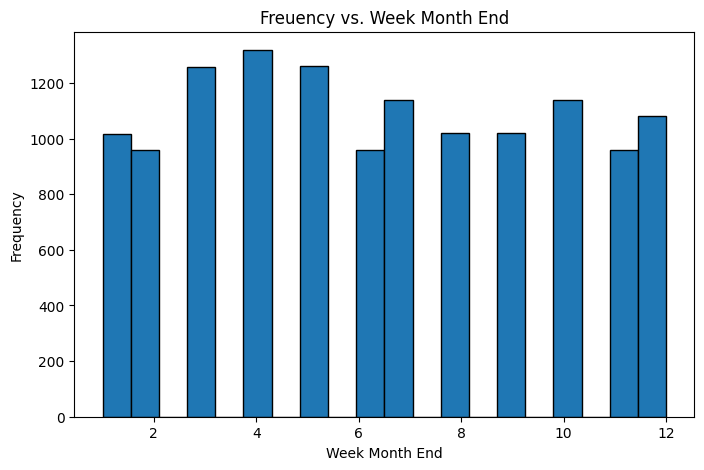

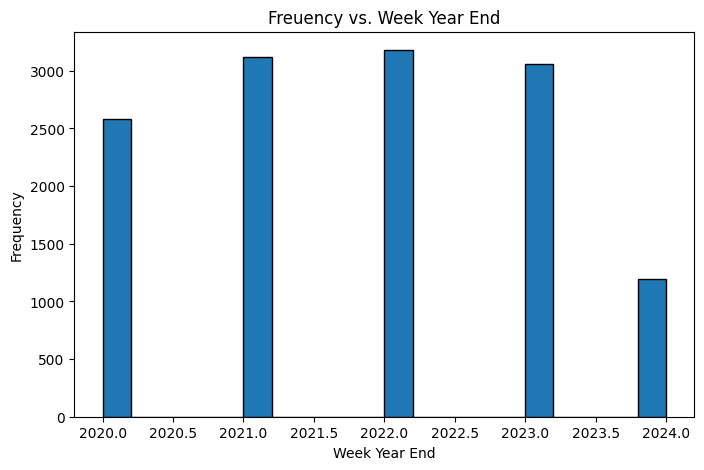

In [ ]:
# EDA
from matplotlib import pyplot as plt

# Show distributions
for col in df.columns[:22]:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Freuency vs. {col}")
    plt.show()


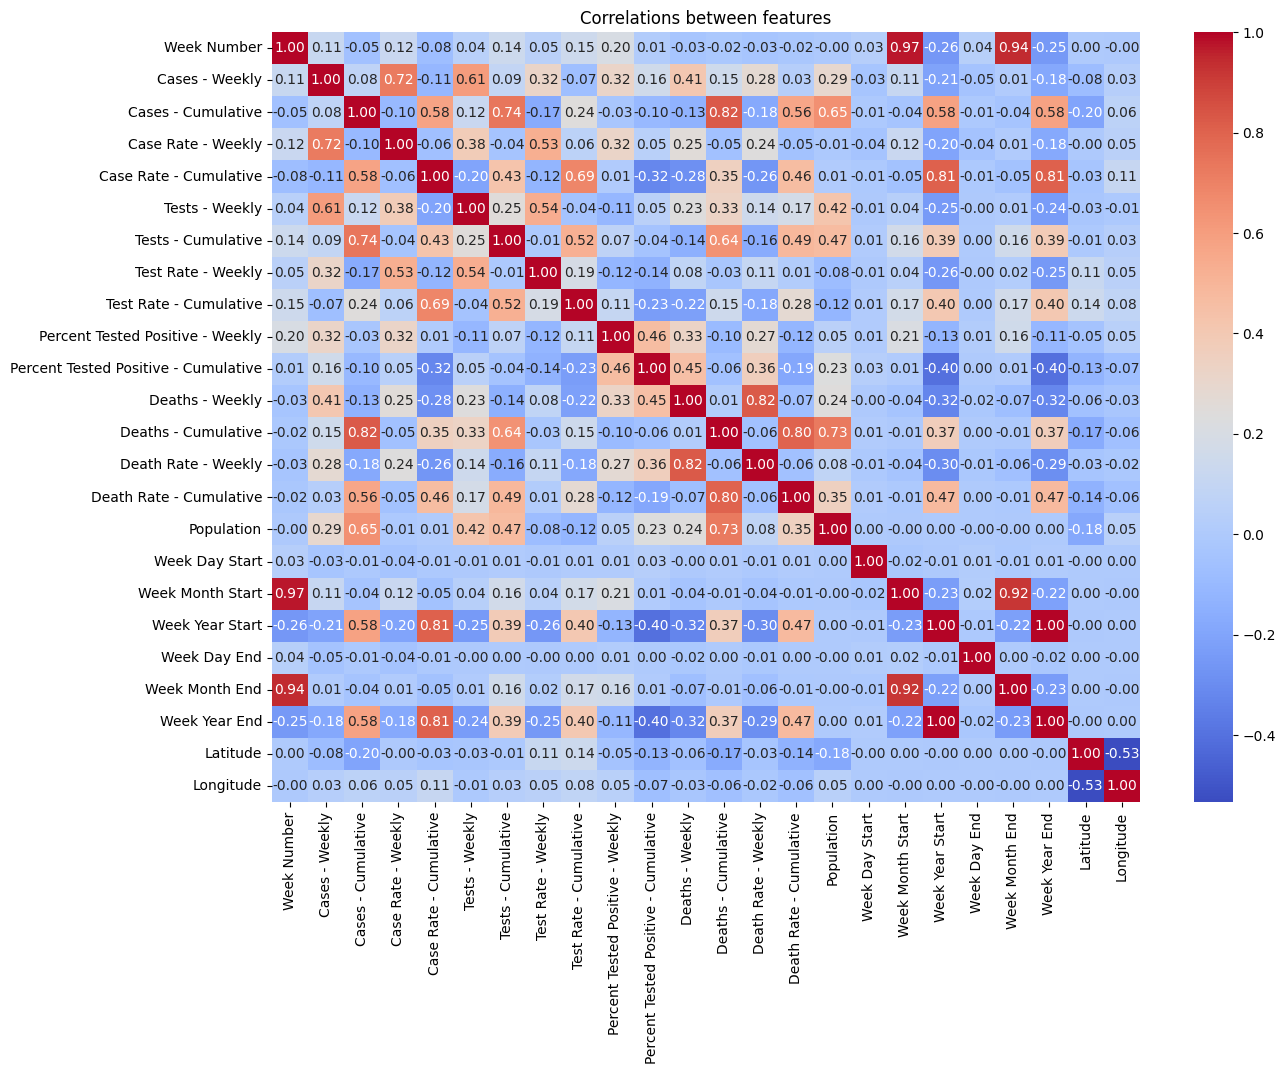

In [ ]:
# Heatmap to depict correlations of features
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlations between features")
plt.show()

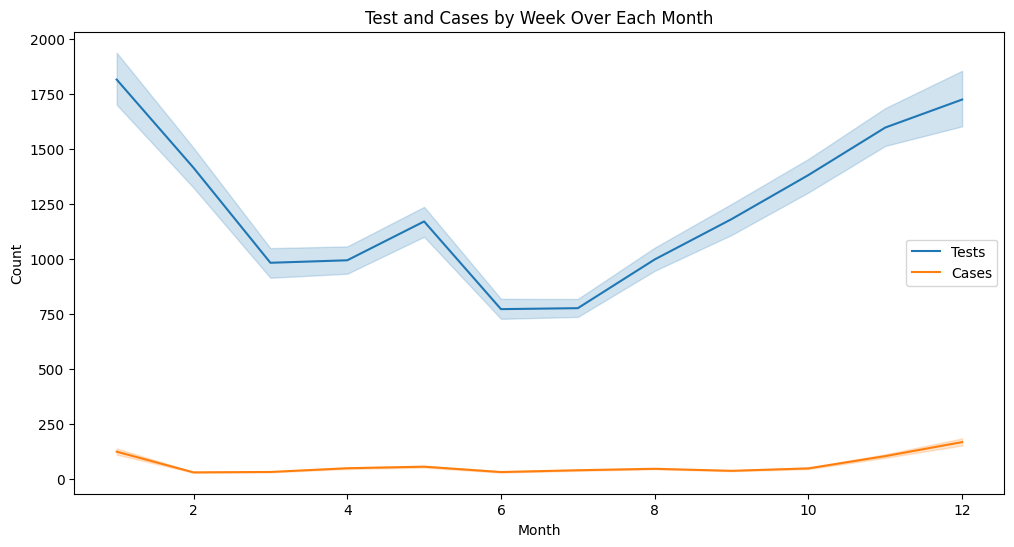

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Week Month Start", y="Tests - Weekly", label="Tests")
sns.lineplot(data=df, x="Week Month Start", y="Cases - Weekly", label="Cases")

plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Test and Cases by Week Over Each Month")
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Handle outliers using interquartile range
for col in df.columns:
  if col != "Deaths - Cumulative" and df[col].dtype in {"float64", "int64", "int32"}:
    Q1 = np.quantile(df[col], 0.25)
    Q3 = np.quantile(df[col], 0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound | df[col] > upper_bound, df[col].mean(), df[col])

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Deaths - Cumulative", axis=1)
y = df["Deaths - Cumulative"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}, R-squared: {r2}")

Mean Squared Error: 4.651693947468595, R-squared: 0.9994333482163438


In [ ]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}, R-squared: {r2}")

Mean Squared Error: 1.009563760944043, R-squared: 0.9998770187565403


In [ ]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split

X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

In [ ]:
# Neural Network for Regressor

class NeuralNetwork(nn.Module):
  def __init__(self, input_size):
    super(NeuralNetwork, self).__init__()
    self.l1 = nn.Linear(input_size, 128)
    self.l2 = nn.Linear(128, 64)
    self.l3 = nn.Linear(64, 32)
    self.l4 = nn.Linear(32,1)
    self.relu = nn.ReLU()

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    out = self.relu(out)
    out = self.l3(out)
    out = self.relu(out)
    out = self.l4(out)
    return out

In [ ]:
def train(model, X_train, y_train, epochs, learning_rate=0.0001, checkpoint_mark=1000):
  loss_fn = nn.MSELoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)

  for epoch in range(1, epochs+1):
    # forward pass
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    # backward pass
    optimizer.zero_grad()
    loss.backward()
    # update weights
    optimizer.step()
    if epoch % checkpoint_mark == 0:
      print(f"Epoch: {epoch} Loss: {loss.item()}")

def predict(model, X_test):
  with torch.no_grad():
    return model(X_test)

def evaluate(y_pred, y_test):
  loss_fn = nn.MSELoss()
  loss = loss_fn(y_pred, y_test)

  y_mean = torch.mean(y_test)
  rss = torch.sum((y_test - y_pred) ** 2)
  tss = torch.sum((y_test - y_mean) ** 2)
  r2 = 1 - (rss / tss)
  print(f"Mean Squared Error: {loss.item()}, R-squared: {r2}")

In [ ]:
neuralNet = NeuralNetwork(X_train.shape[1])
train(neuralNet, X_train, y_train, epochs=20000, learning_rate=0.001, checkpoint_mark=1000)

Epoch: 1000 Loss: 1055.1947021484375
Epoch: 2000 Loss: 4807.7607421875
Epoch: 3000 Loss: 530.6231689453125
Epoch: 4000 Loss: 288.2898864746094
Epoch: 5000 Loss: 738.2683715820312
Epoch: 6000 Loss: 145.4492950439453
Epoch: 7000 Loss: 168.7322998046875
Epoch: 8000 Loss: 134.44586181640625
Epoch: 9000 Loss: 89.1448745727539
Epoch: 10000 Loss: 297.4049987792969
Epoch: 11000 Loss: 33.29277038574219
Epoch: 12000 Loss: 25.302337646484375
Epoch: 13000 Loss: 108.74617767333984
Epoch: 14000 Loss: 63.43532180786133
Epoch: 15000 Loss: 92.73607635498047
Epoch: 16000 Loss: 98.36744689941406
Epoch: 17000 Loss: 49.04039764404297
Epoch: 18000 Loss: 26.665674209594727
Epoch: 19000 Loss: 11.772050857543945
Epoch: 20000 Loss: 131.6473846435547


In [ ]:
y_pred = predict(neuralNet, X_test)
evaluate(y_pred, y_test)

for pred, actual in zip(y_pred[:20], y_test[:20]):
  print(f"Predicted: {pred[0]}, Actual: {actual[0]}")

Mean Squared Error: 103.93816375732422, R-squared: 0.987338662147522
Predicted: 11.833040237426758, Actual: 9.0
Predicted: 200.5200958251953, Actual: 187.0
Predicted: 188.98048400878906, Actual: 171.0
Predicted: 19.664775848388672, Actual: 19.0
Predicted: 7.0867018699646, Actual: 3.0
Predicted: 61.8182258605957, Actual: 57.0
Predicted: 250.35848999023438, Actual: 233.0
Predicted: 75.68701171875, Actual: 71.0
Predicted: 54.668582916259766, Actual: 54.0
Predicted: 0.09532105922698975, Actual: 0.0
Predicted: 217.40878295898438, Actual: 201.0
Predicted: 73.90278625488281, Actual: 72.0
Predicted: -0.6059774160385132, Actual: 0.0
Predicted: 81.40068054199219, Actual: 75.0
Predicted: 0.819898247718811, Actual: 0.0
Predicted: 131.1720428466797, Actual: 119.0
Predicted: 6.152280330657959, Actual: 10.0
Predicted: 4.757174015045166, Actual: 3.0
Predicted: 20.047487258911133, Actual: 19.0
Predicted: 213.94602966308594, Actual: 203.0
